In [ ]:
Zahra Alinaghipoor

# **جلسه اول : نمایش خوشه ای نرخ بازدهی بازار سهام**

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


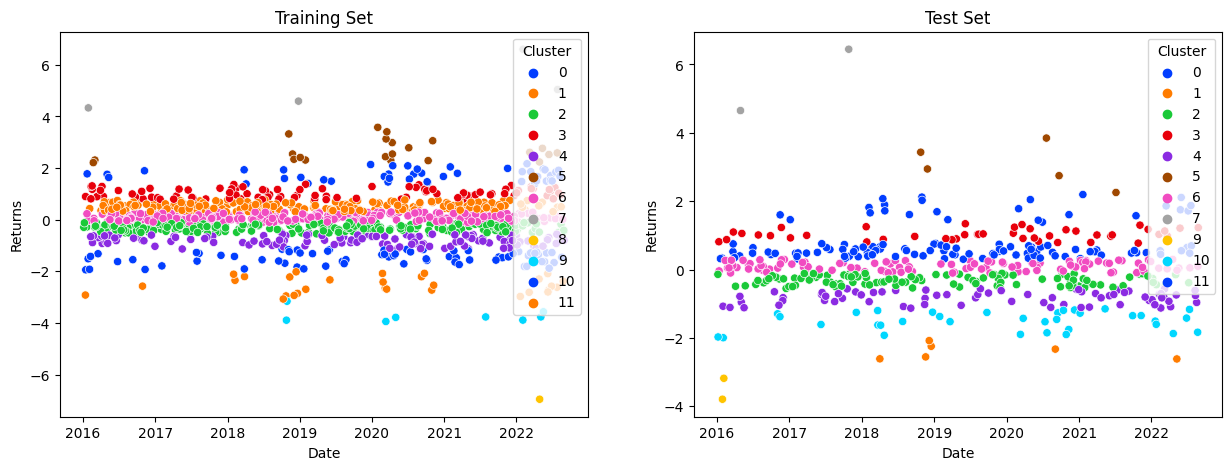

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[ 9  3  1  3  7  8  3  2  3  6  2  2  1  4  1  2  4  1  2  3  7  3  4  1
  1  2  1  1  5  3  3  7  4  1  2  4  1  5  2  4  4  7  0  8  3  4  1  3
  4  1  7  4  1  3  2  2  3  3  8  1  3  2  1  4  1  6  4  1  2  6  1  1
  3  1  7  2  1  7  1  2  3  2  2  1  3  1  1  3  6  6  1  1  4  3  1  3
  3  4  2  3  2  3  6  7  4  3  6  3  2  4  2  1  3  3  1  3  2  1  6  7
  2  1  3  2  9  1  3  3  2  1  7  4  3  1  3  5  6  1  1  2  3  2  3  9
  2  2  1  3  3  8  2  5  4  3  2  3  2  7  3  7  3  4  1  2  7  3  2  7
 10  3  6  3  1  1  3  1  2  6  7  6  3  1  3  2  3  2  3  7  1  2  4  4
  1  1  1  5  7  4  2  1  6  2  6  4  4  7  3  2  5  2  2  1  2  2  7  7
  1  9  3  6  1  3  4  5  3  2  2  1  3  2  1  4  5  5  2  6  7  1  7  1
  7  6  4  3  6  4  3  4  1  7  4  3  3  7  4  3  0  1  1  3  3  2  4  4
  2  8  1  3  2  1  7  3  3  2  2  7  3  5  2  3  3  1  4  2  2  1  6  2
  6  1  1  1  1  4  2  2  1  4  7  7  2  4  4  2  3  5  7  1  2  6  3  4
  4  1  7  1  3  5  1  3  2  1  1  2  2  6  4 10  1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6769647032530228, 0.660603952149425, 0.6659177694859624, 0.6981038074937675, 0.7507877555392642, 0.8323619471707722, 0.8589086983531726, 0.9013477354495273, 0.9093736161783823, 0.9132531427331708, 0.9136746393793578]


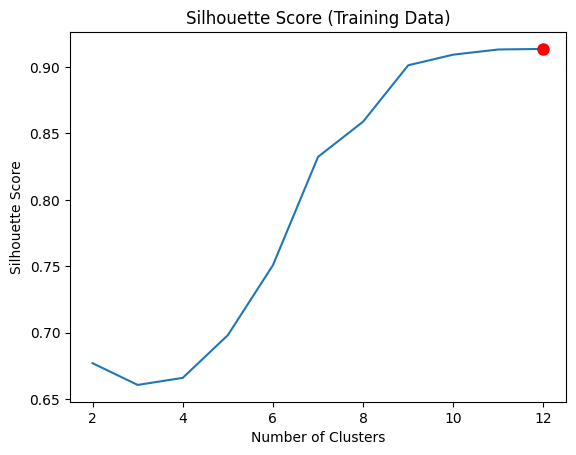

In [2]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "AMZN"
start_date = "2016-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

#Return_Daily=V_(today-V_yesterday )/V_yesterday *100

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

# Perform KMeans clustering on the training set
kmeans = KMeans(n_clusters=12, random_state=0).fit(X_train)
X_train['Cluster'] = kmeans.labels_

# Apply the clustering to the test set
X_test['Cluster'] = kmeans.predict(X_test)

# Plot the clusters on the training and test sets
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=X_train, x=X_train.index, y='Returns', hue='Cluster', palette='bright', ax=axs[0])
sns.scatterplot(data=X_test, x=X_test.index, y='Returns', hue='Cluster', palette='bright', ax=axs[1])
axs[0].set(title='Training Set')
axs[1].set(title='Test Set')
plt.show()



# Evaluate the performance of KMeans on the training set using Silhouette

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def find_best_n_clusters(X):
    silhouette_scores = []
    for k in range(2, 13):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return best_n_clusters

# Find the best number of clusters for training data
best_n_clusters_train = find_best_n_clusters(X_train)

# Fit KMeans with the best number of clusters for training data
kmeans_train = KMeans(n_clusters=best_n_clusters_train)
kmeans_train.fit(X_train)

# Find the best number of clusters for test data
best_n_clusters_test = find_best_n_clusters(X_test)

# Fit KMeans with the best number of clusters for test data
kmeans_test = KMeans(n_clusters=best_n_clusters_test)
kmeans_test.fit(X_test)

# Get the labels for test data
test_cluster_labels = kmeans_test.labels_
test_label=print(test_cluster_labels)

# Plot the evaluation metrics for training data
silhouette_scores_train = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))


scores=print(silhouette_scores_train)

sns.lineplot(x=range(2, 13), y=silhouette_scores_train)
plt.plot(best_n_clusters_train, silhouette_scores_train[best_n_clusters_train-2], 'ro', markersize=8)
plt.title('Silhouette Score (Training Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()




